# Character Recognition Tool

Created by 
Joshua Baldwin | baldw225@msu.edu & Ralf Schmaelzle | schmaelz@msu.edu

Describe Functionality here...

In [54]:
## Install Packages - uncomment if needed
#!pip install pliers
#!pip install python-magic
#!pip install face_recognition 
#!pip3 install --upgrade pandas
#!pip install libmagic
#!brew upgrade cmake
#!homebrew, ffmpeg, dlib
#!brew install  dlib
#!brew install libmagic

## Import Tools

In [55]:
import sys, PIL, os
from os.path import join
import numpy as np

from pliers.tests.utils import get_test_data_path
from pliers.extractors import (FaceRecognitionFaceLocationsExtractor, FaceRecognitionFaceEncodingsExtractor, 
                               FaceRecognitionFaceLandmarksExtractor,SaliencyExtractor, BrightnessExtractor, merge_results)
from pliers.filters import FrameSamplingFilter
import face_recognition
from pliers.graph import Graph
import pandas as pd 


import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

## Provide folder paths for input files

In [56]:
#Name the Project Below
project_name = 'My_First_CRT_Analysis'
project_name

#what's this needed for?

'My_First_CRT_Analysis'

In [57]:
#Import Video
video_reference = '../data/input_data/videos/Shark_Tank/Shark_Tank.mp4'
video_reference
print('This project will use ' + str(video_reference) + ' as the input video.')

This project will use ../data/input_data/videos/Shark_Tank/Shark_Tank.mp4 as the input video.


The CRT will search for 7 characters.
The CRT will identify the following characters: 


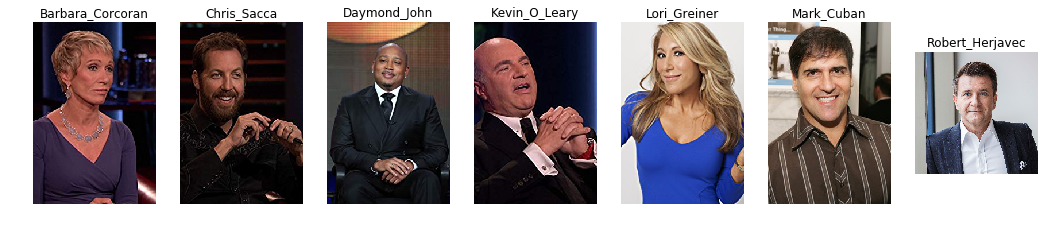

In [60]:
#Import Reference Images 
reference_image_dir = '../data/input_data/reference_images/Shark_Tank/'
character_images = [i for i in os.listdir(reference_image_dir) if i.endswith('.jpg')]
n_character_images = len(character_images) 
print('The CRT will search for ' + str(n_character_images) + ' characters.')

#What are the Names of the Characters (Alphabetical)?
character_names = [x[:-4] for x in character_images ]
n_characters = len(character_names)
print('The CRT will identify the following characters: ')

plt.figure(figsize=(18,4))
for num, x in enumerate(character_images):
    img = PIL.Image.open(os.path.join(reference_image_dir, x))
    plt.subplot(1,n_characters ,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

## Set frame rate and describe input 

In [61]:
#change to value you prefer (values near 1 are more accurate, higher values will skip frames...)
rate = 4450 
print('We will work with a frame rate of ' + str(rate) + ' frames.')

sampler = FrameSamplingFilter(every = rate)
frames = sampler.transform(video_reference)
n_frames = frames.n_frames
n_frames_analyze = round(n_frames/24)
print('The current extraction will work on ' + str(n_frames) + ' frames.')
if (n_frames) < 100:
    print('This should be pretty quick')
else: 
    print('This may take a while')

We will work with a frame rate of 4450 frames.
The current extraction will work on 17 frames.
This should be pretty quick


## Set up face-encodings of known images 

Describe what a face encoding means.... - possibly with some inline code

7 character templates have been encoded and can now be searched.


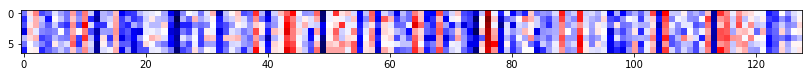

In [62]:
known_faces = []

for character in character_images:
    known_character_image =  face_recognition.load_image_file(reference_image_dir + character)
    known_character_encoding = face_recognition.face_encodings(known_character_image)[0]
    #print (character)
    known_faces.append(known_character_encoding)
    
plt.figure(figsize = (14,8))
plt.imshow(known_faces, cmap = 'seismic');
#plt.ylabel(character_images)
#plt.colorbar();
print(str(len(known_faces)) + ' character templates have been encoded and can now be searched.')

## Go through frames, detect faces, match them to templates, and create output

This is the meat of the code....

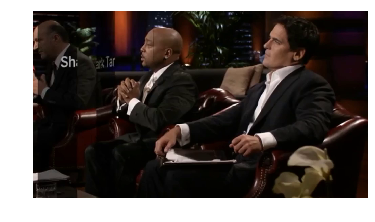

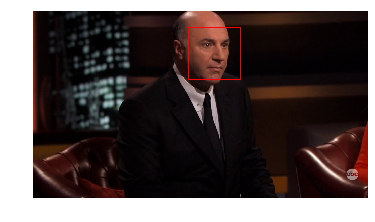

I see the face of 
Kevin_O_Leary
--


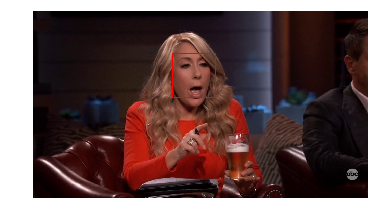

I see the face of 
Lori_Greiner
--


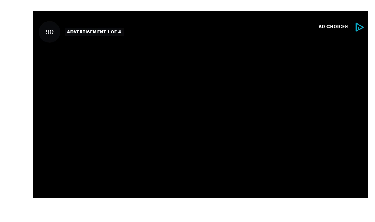

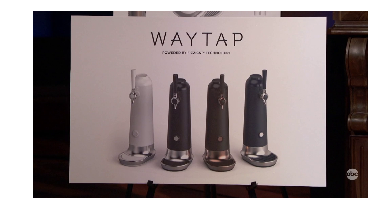

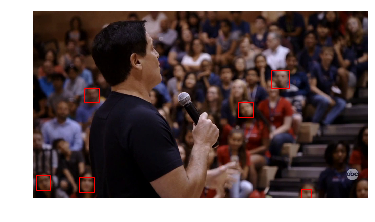

I see a face that I do not recognize!
(487, 50, 530, 7)


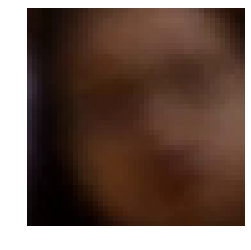

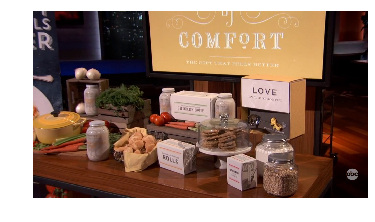

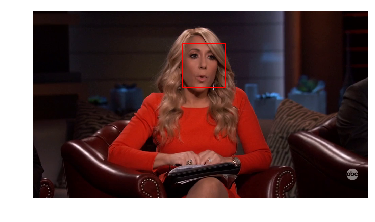

I see the face of 
Lori_Greiner
--


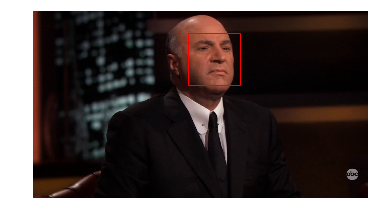

I see the face of 
Kevin_O_Leary
--


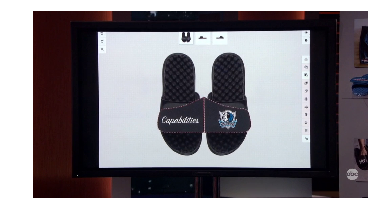

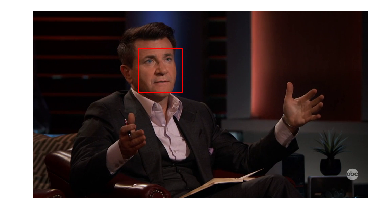

I see the face of 
Robert_Herjavec
--


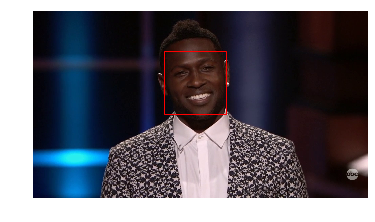

I see a face that I do not recognize!
(118, 572, 304, 386)


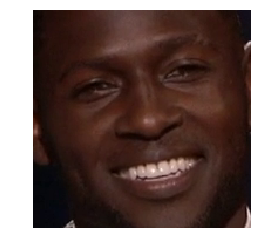

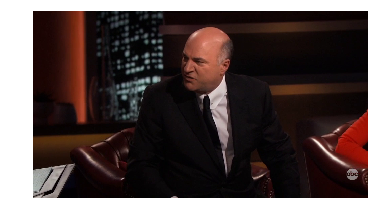

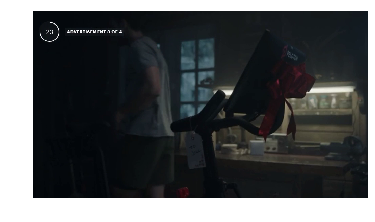

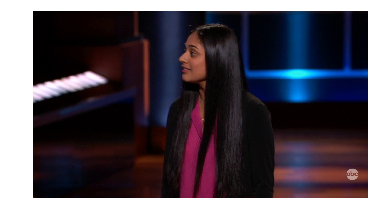

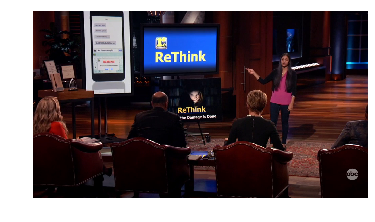

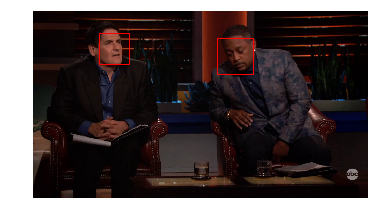

I see the face of 
Mark_Cuban
--
I see a face that I do not recognize!
(66, 285, 156, 195)


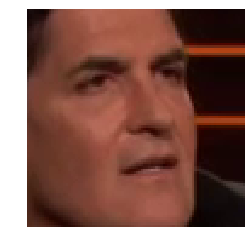

,Barbara_Corcoran,Chris_Sacca,Daymond_John,Kevin_O_Leary,Lori_Greiner,Mark_Cuban,Robert_Herjavec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
unkonown_face_counter = 0
res = []
for curr_frame_number in np.arange(0, n_frames, 1):
    #sys.stdout.write(" %d, \r" % (curr_frame_number) )
    #sys.stdout.flush()
    
    # load the current frame as an image
    curr_frame = frames.get_frame(curr_frame_number).video.get_frame(curr_frame_number).video.get_frame(curr_frame_number).data

    # display for now
    fig, ax = plt.subplots(1)
    ax.imshow(curr_frame)

    # detect faces and plot them (for now) based on location info...
    face_locations = face_recognition.face_locations(curr_frame)
    if len(face_locations)>0:
        #print('I see a face!')
        for curr_face in range(len(face_locations)):
        
            l1 = (face_locations[curr_face][2] - face_locations[curr_face][0])
            l2 = (face_locations[curr_face][1] - face_locations[curr_face][3])
            rect = patches.Rectangle((face_locations[curr_face][3], face_locations[curr_face][0]), l1,l2, edgecolor = 'r', facecolor='none')

            ax.add_patch(rect)
            

    plt.axis('off')
    plt.show()
    sys.stdout.flush()
    
    
    # for all detected faces, compute their encodings....
    face_encodings = face_recognition.face_encodings(curr_frame, face_locations)

    if len(face_encodings)>0 :
        
        # compare the recognizes&encoded faces with the known faces' encodings....
        results = face_recognition.compare_faces(known_faces, face_encodings[0])
        if (sum(results)>0):
            print('I see the face of ')
            #print(results)
            print(character_names[np.where(results)[0][0]])
            print('--')
            
        #### This is where we do the surgery to add the unknown/feedback/human in the loop part
        
        # if more faces are detected than recognized, then we conclude that new faces are present
        if (len(face_encodings) > sum(results)):
            print('I see a face that I do not recognize!')
            
            #cut out the new faces and put them in folder...
            #for current_face_seen in range( len(face_encodings[0]) ):
            
            print(face_locations[0])
            cc= curr_frame[ face_locations[0][0]:face_locations[0][2], 
            face_locations[0][3]:face_locations[0][1],
            :]

            plt.imshow(cc)
            plt.axis('off')
            plt.show()
            
            from PIL import Image
            im = Image.fromarray(cc)
            unkonown_face_counter += 1
            filename_uf = '../data/input_data/unknown_reference_images/unknown_face_' + str(unkonown_face_counter) + '.jpg'
            im.save(filename_uf)
            
            #face_recognition.compare_faces(known_faces, face_encodings[0])
            
        
        
        ####
        
        
        #append the results...
        res.append(results)
    else:
        res.append([False] * n_character_images)
        
res2 = np.asarray(res)
np.asarray(res2[0])

new_result = np.zeros((n_frames,n_characters))

for this_line in range(n_frames):
    new_result[this_line,:] = np.asarray(res2[this_line])

df2 = pd.DataFrame( data    = new_result,
                    columns = character_names );
df2.to_csv('../data/output_data/' + project_name + '_face_recognition.csv')
df2

In [79]:
l1 = (face_locations[curr_face][2] - face_locations[curr_face][0])
l2 = (face_locations[curr_face][1] - face_locations[curr_face][3])


In [ ]:
face_locations[curr_face][0]

In [78]:
curr_frame.shape

(554, 992, 3)

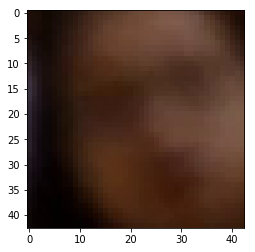

In [81]:
face_locations[0][0]

487

In [82]:
face_locations[0][1]

50

In [83]:
face_locations[0][2]

530

In [84]:
face_locations[0][3]

7